## Import các thư viện cần thiết

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.tsa.seasonal import seasonal_decompose

import numpy as np
sns.set()
font = {
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

## Đọc dữ liệu 

In [3]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

data['mpg']
data.mpg
data.iloc[0,:]

print(data.shape)

num_duplicate = data.duplicated().sum()

(406, 9)


**Câu 01**

In [4]:
#Cau01
print("\nCau01:\n")

def check_duplicate():
    if num_duplicate == 0:
        print("So xe:", data.shape[0],"\n")
        print("So thuoc tinh:", data.shape[1])
    else:
        print("So xe:", data.shape[0]-num_duplicate)
        print("So thuoc tinh", data.shape[1])

check_duplicate()


Cau01:

So xe: 406 

So thuoc tinh: 9


**Câu 02**

In [5]:

print("\nCau02:\n")

pd. set_option('display.max_columns', None)

def get_producer(name):
    get_list = name.split(" ")
    return get_list[0]

data["producer"] = data["car_name"].apply(get_producer)

best_mpg = data.loc[data["mpg"].idxmax(), "car_name"]

print("1. The best mpg car: ", best_mpg, "\n")

def count_8_cylinders(x):
    return x[x==8.0].count()

most_8_cylinder_company = data.groupby(["producer"])["cylinders"].apply(count_8_cylinders).idxmax()


print("2. The company produced the most 8_cylinders_car:", most_8_cylinder_company, "\n")

name_3_cylinder_car = data.loc[data.cylinders==3.0,"car_name"]

print("3. Name of 3_cylinder_car:\n ")

for name in name_3_cylinder_car:
    print("- ", name)


Cau02:

1. The best mpg car:  mazda glc 

2. The company produced the most 8_cylinders_car: ford 

3. Name of 3_cylinder_car:
 
-  mazda rx2 coupe
-  maxda rx3
-  mazda rx-4
-  mazda rx-7 gs


**Câu 03**

In [7]:
#Cau03
# Xet cac thong tin cua cac thuoc tinh numerical
numerical = [col for col in data.columns if data[col].dtype=='float64']
nume_df = data[numerical]
min_att = np.min(nume_df, axis=0)
max_att = np.max(nume_df, axis=0)
std_att = np.std(nume_df, axis=0)
missing_nume = nume_df.isna().sum()/len(data)

describe_df = pd.DataFrame({"Min":min_att, "Max": max_att, "Standard Deviation": std_att, "Missing Percentage": missing_nume})
describe_df.T

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
Min,9.000000,3.00000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
Max,46.600000,8.00000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000
Standard Deviation,7.806159,1.71005,104.793164,38.720288,845.960576,2.799904,3.744118,0.796496
Missing Percentage,0.019704,0.00000,0.000000,0.014778,0.000000,0.000000,0.000000,0.000000


In [8]:
# Thong tin cua cac cot categorical
cate_col = [col for col in data.columns if data[col].dtype=='object']
cate_df = data[cate_col]
cate_df.describe()

,car_name,producer
count,406,406
unique,312,38
top,ford pinto,ford
freq,6,53


**Câu 04**

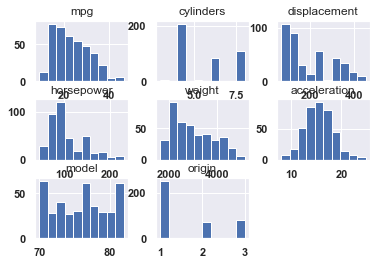

In [9]:
#Cau04

ax=nume_df.hist()

**Câu 05**


He so tuong quan giua weight va mpg la:  -0.8317409332443344 



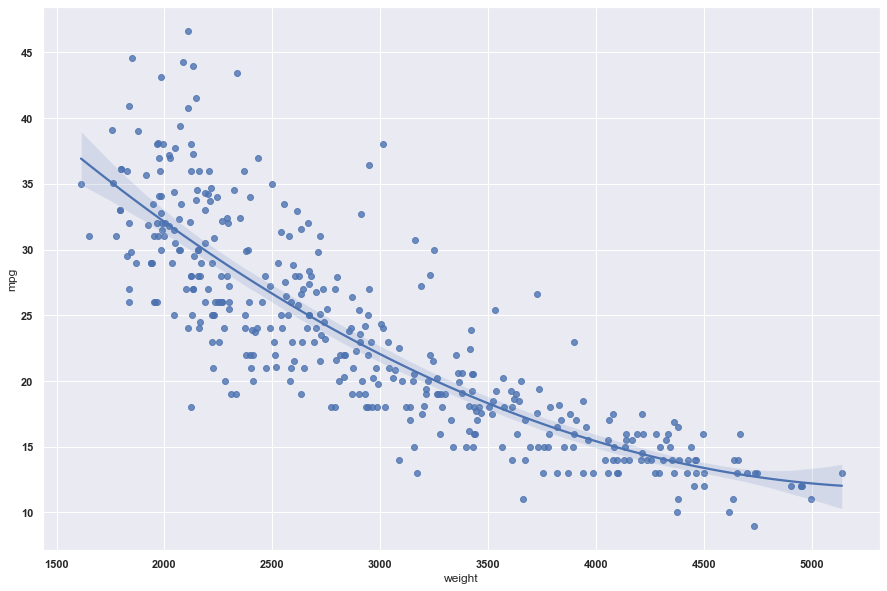

In [10]:
# Cau 05
plt.figure(figsize=(15,10))
sns.regplot(data=nume_df, x="weight", y="mpg",order=3, fit_reg=True)
weight_mpg_corr = np.correlate(nume_df["weight"],nume_df["mpg"])

corr = nume_df.corr().loc["mpg", "weight"]

print("\nHe so tuong quan giua weight va mpg la: ", corr,"\n")

## Nhận xét

- Khi **weight** càng tăng thì **mpg** càng giảm

**Câu 06**

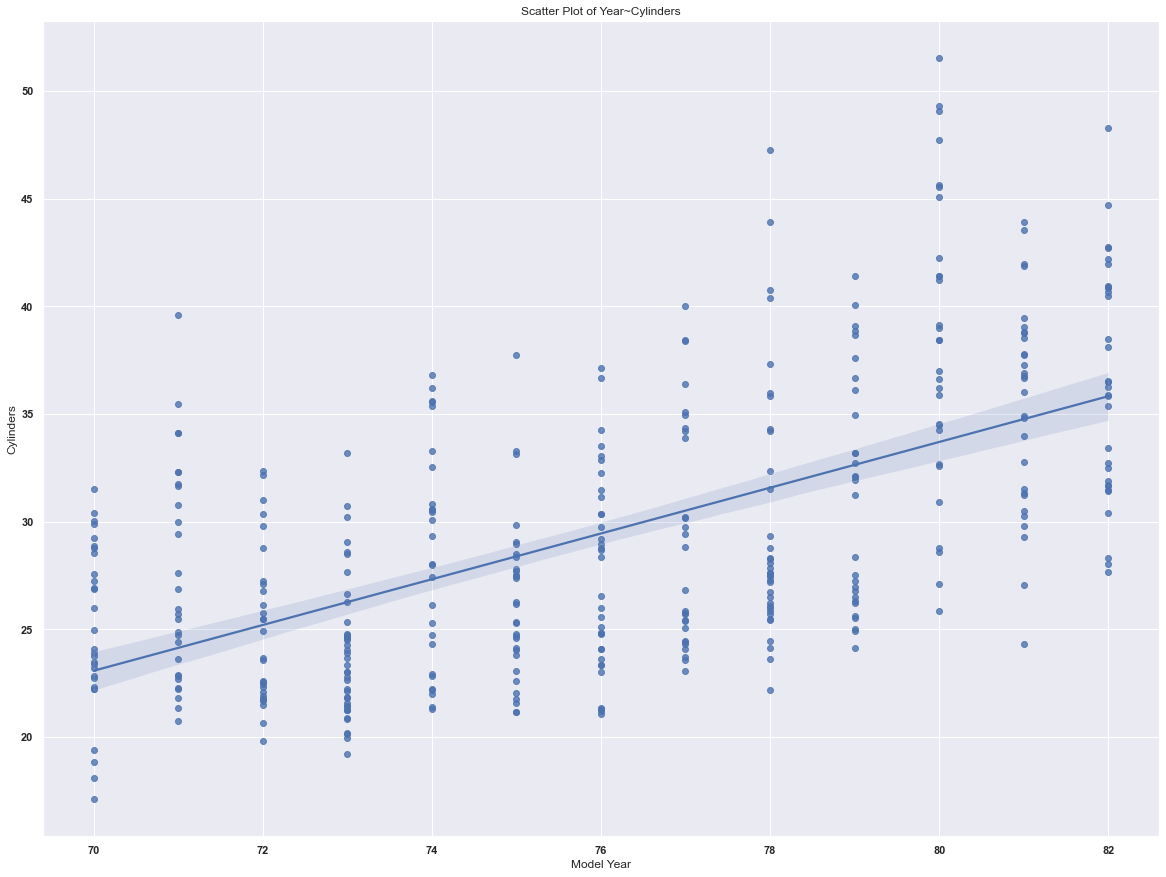

In [12]:
##Cau06
plt.figure(figsize=(20,15))
y_axis = data.cylinders+data.mpg + np.random.random(len(data.mpg))
sns.regplot(data=data, x="model", y=y_axis.values)
plt.xlabel("Model Year")
plt.ylabel("Cylinders")
plt.title("Scatter Plot of Year~Cylinders")
plt.show()

## Nhận xét:
Dựa trên biểu đồ phân tán và vẽ đường hồi quy, ta có thể rút ra kết luận:
- Số lượng cylinders trong xe có xu hướng tăng qua các thập niên

**Câu 07**

In [13]:
#Cau08:
num_cars = data.groupby(["producer"])["car_name"].nunique()
num_cars = num_cars.sort_values(ascending=False)

Text(0, 0.5, 'Producer')

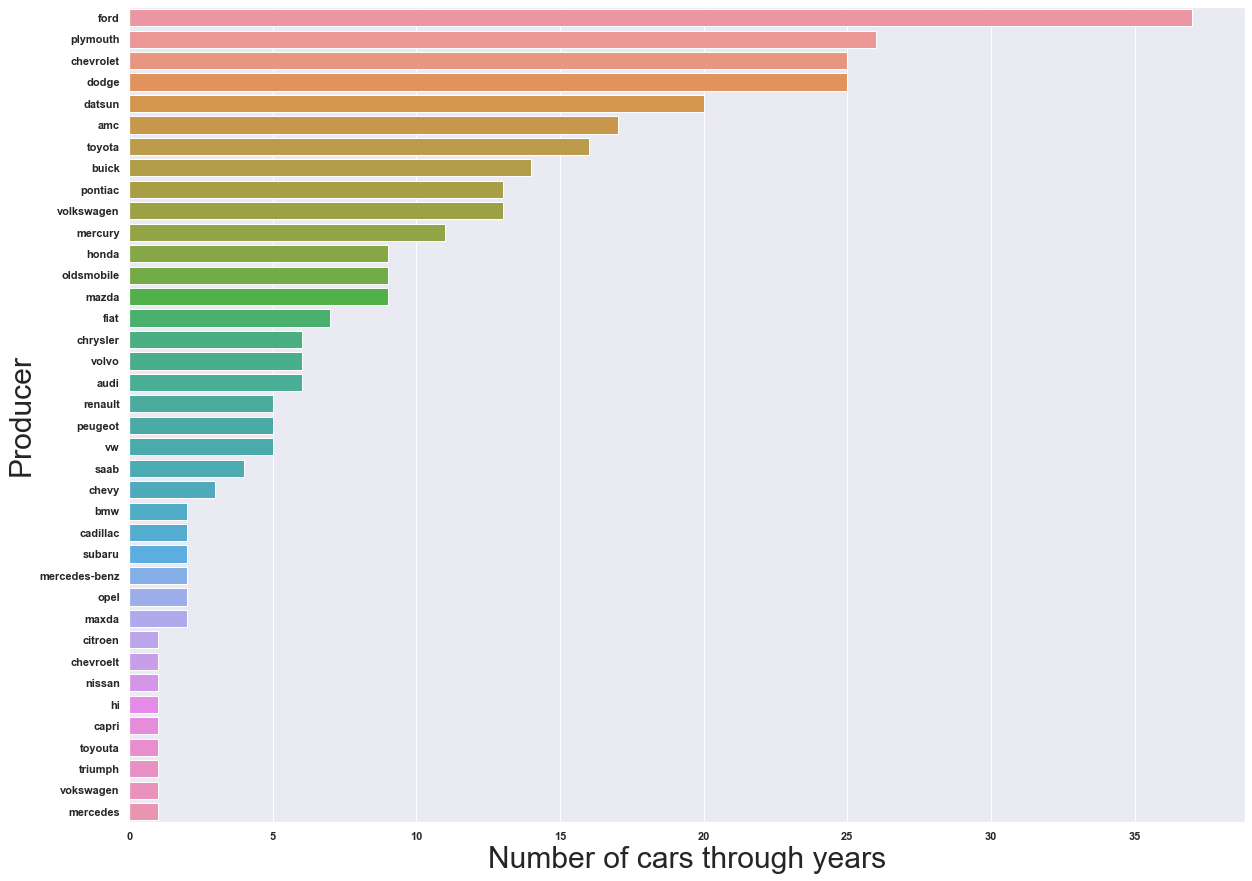

In [14]:
plt.figure(figsize=(20,15))
sns.barplot(y=list(num_cars.index), x=num_cars.values, orient="h")
plt.xlabel("Number of cars through years", fontsize=30)
plt.ylabel("Producer", fontsize=30)

## Nhận xét:
- Ford là công ty có số lượng xe sản xuất nhiều nhất qua các năm

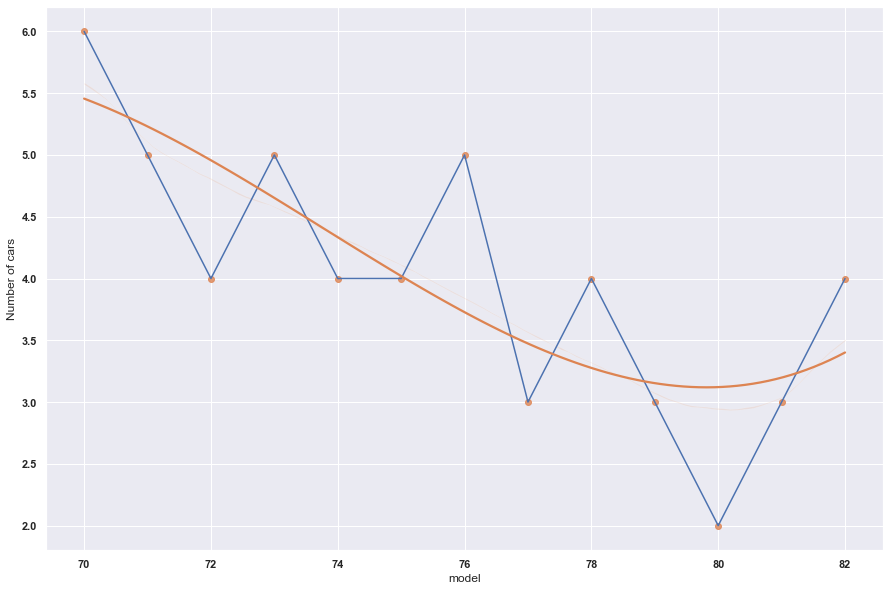

In [31]:
plt.figure(figsize=(15,10))
num_ford_cars = data[["model","producer","car_name"]].loc[data.producer=="ford",:].groupby(["model"])["car_name"].nunique()
num_ford_cars.plot(legend=False)
sns.regplot(x=num_ford_cars.index, y=num_ford_cars.values, order=3,ci=0.95)
plt.ylabel("Number of cars")
plt.show()

## Nhận xét:
Đối với Ford:
- Từ 70s đến giữa những 78s-80s số lượng xe có xu hướng giảm
- Từ 80s-82s số lượng xe có xu hướng tăng trở lại

**Câu 07**

In [50]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model', 'origin', 'car_name', 'producer'],
      dtype='object')

<AxesSubplot:xlabel='cylinders', ylabel='weight'>

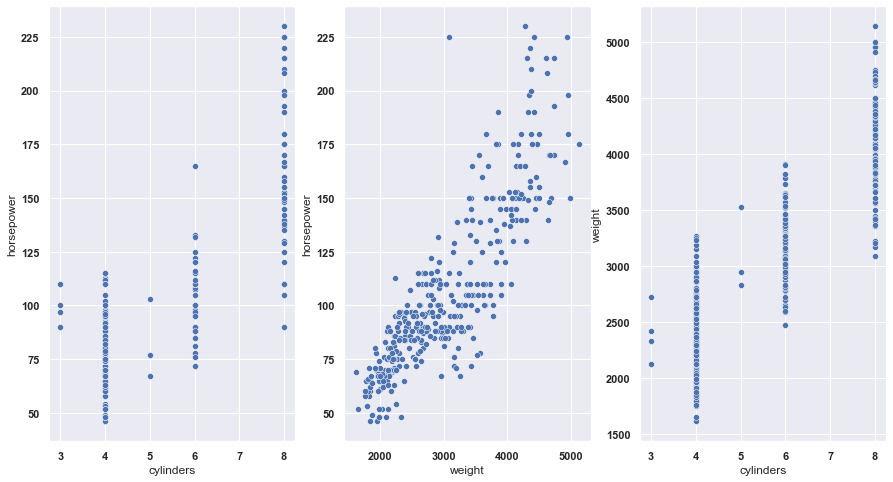

In [64]:
fig, axes=plt.subplots(1,3,figsize=(15,8))

sns.scatterplot(data=data, x="cylinders", y ="horsepower", ax=axes[0])

sns.scatterplot(data=data, x="weight", y ="horsepower", ax=axes[1])

sns.scatterplot(data=data, x="cylinders", y ="weight", ax=axes[2])

## Nhận xét:

- Có vẻ như việc tăng số xi lanh (cylinders) giúp gia tăng sức mạnh của một chiếc xe lên rất nhiều bởi cả mã lực (horsepower)
- Cả khi khối lượng của xe tăng cũng giúp cho việc tăng mã lực của xem.
- Nhưng ta có thể thấy từ đồ thị bên phải cùng ở trên khi mà số lượng cylinders nhiều cũng làm tăng khối lượng xe.
- Từ đó có thể thấy việc gia tăng số xi lạnh trên xe giúp cải thiện rất nhiều sức mạnh của một chiếc xe

<AxesSubplot:xlabel='displacement', ylabel='horsepower'>

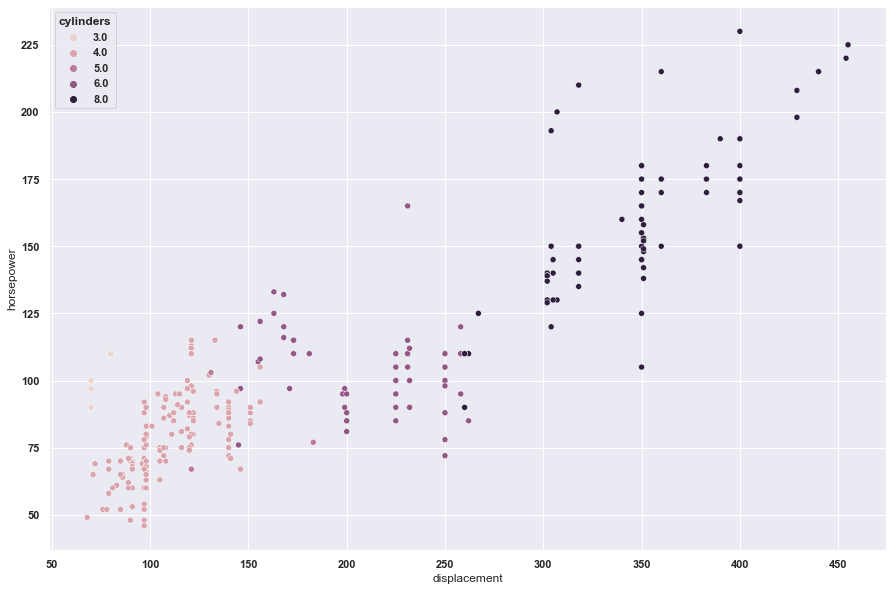

In [68]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=data, x="displacement", y ="horsepower", hue = "cylinders")

**Đồ thị này còn cho ta thấy nhiều hơn nữa:**
* Số lượng xi lanh rất quan trọng nhưng không phải xe có nhiều xi lanh sẽ tốt hơn xe có ít xi lanh.
* Vẫn có một số ít xe có ít xi lanh (màu tím) nhưng có dung tích xi lanh nhiều (displacement) vẫn có mã lực tốt.
* Và hầu hết các xe có nhiều xi lanh và cả dung tích xi lanh lớn đều có sức mạnh ấn tượng.
* Tổng kết lại ta thấy rằng: nếu một nhà sản xuất muốn tăng sức mạnh của một chiếc xe có thể tăng số xi lanh và dung tích xi lanh. Nhưng điều này có thể làm tăng khối lượng xe lên. Nghĩa là nhà sản xuất nên tăng số xi lanh ở một giới hạn nhất định có thể đảm bảo chất lượng cho xe

**Câu 08: Dữ liệu time series sản lượng của các hãng xe qua các thập niên**

In [42]:
time_data = data[["producer","model", "car_name"]].groupby(["producer", "model"]).nunique()
time_data.reset_index(inplace=True)

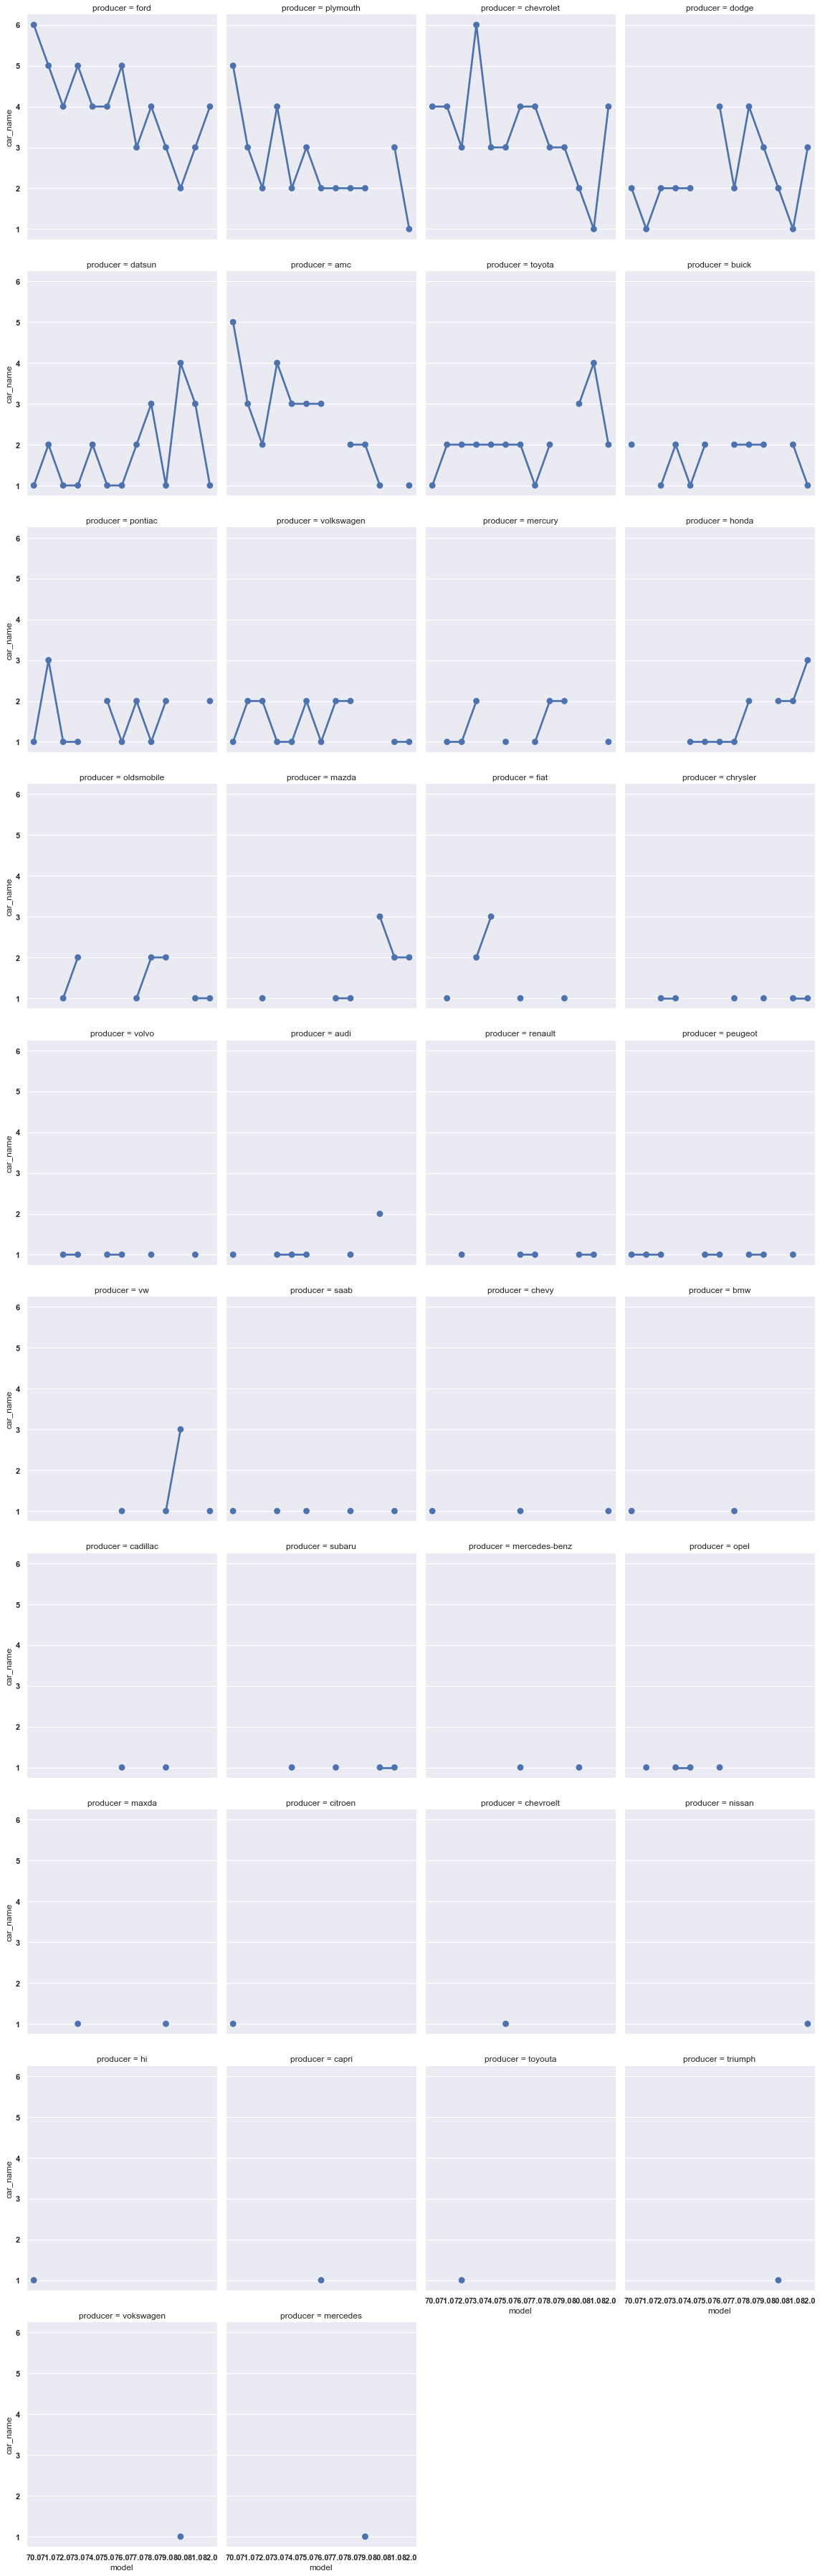

In [43]:
sns.catplot(kind="point",data=time_data, x="model", y="car_name", col="producer", col_wrap=4,aspect=.8,col_order= num_cars.index)
plt.tight_layout()
plt.ylabel("Number of cars")
plt.show()

## Nhận xét:
- Có thể thấy các hãng đèu có một giai đoạn giảm số lượng (78s - 80s)
- Trong đó ford, chervelet đang có phục hồi từ (80s). Và nếu dữ liệu đầy đủ có thể thấy ford khá phổ biến

**Câu 09: Heatmap of correlation matrix**

In [44]:
corr = data.iloc[:,0:8].corr()

<AxesSubplot:>

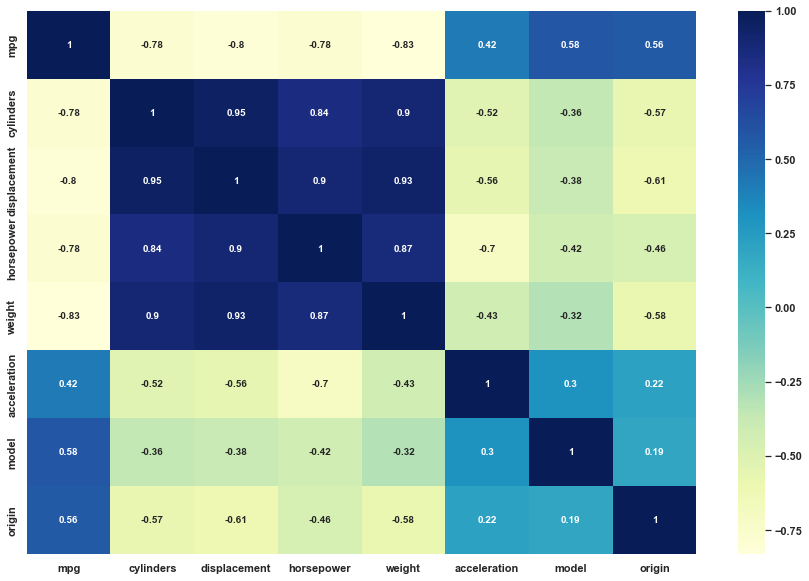

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, cmap="YlGnBu")

## Nhận xét:
- Heatmap này giúp khẳng định lại những điều ở câu 07: mối liên hệ giữa horsepower, cylinders, displacement, weight khi mà kệ số tương quan đều dương và có giá trị lớn (gần 1).